In [1]:
from utils.polarity import Polarity
from utils.data import Data
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('political_posts.csv')
data = Data(df)
dfs = data.time_series_split()
train_df = dfs[0]
vecs = np.load('models/vector_size_256__max_vocab_size_10000__epochs_120.model.dv.vectors.npy')

In [3]:
polarity_obj = Polarity(train_df, vecs, standartize_vecs=False)

C:\Users\ntser\Projects\BA_Thesis\utils\polarity.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['vecs'] = self.vecs.tolist()
C:\Users\ntser\Projects\BA_Thesis\utils\polarity.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['vecs'] = self.df['vecs'].apply(lambda x: np.array(x))
C:\Users\ntser\Projects\BA_Thesis\utils\polarity.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [4]:
polarity_df = polarity_obj.get_polarity(get_mean=True, get_std=True)
polarity_df.head(10)

,date,comb,polarity,polarity_mean,polarity_std
0,2020-01-31,"(imedinews.ge, 1tv.ge)",0.0,0.000000,0.000000
1,2020-01-31,"(imedinews.ge, formulanews.ge)",RandomMixture(0.142469 * CompositeDistribution...,-0.024016,0.000212
2,2020-01-31,"(imedinews.ge, mtavari.tv)",RandomMixture(0.437233 * CompositeDistribution...,0.910032,0.004307
3,2020-01-31,"(1tv.ge, formulanews.ge)",RandomMixture(0.0378335 * CompositeDistributio...,-0.012000,0.000013
4,2020-01-31,"(1tv.ge, mtavari.tv)",RandomMixture(0.11611 * CompositeDistribution=...,0.307716,0.000294
5,2020-01-31,"(formulanews.ge, mtavari.tv)",0.0,0.000000,0.000000
6,2020-02-29,"(imedinews.ge, 1tv.ge)",0.0,0.000000,0.000000
7,2020-02-29,"(imedinews.ge, formulanews.ge)",RandomMixture(0.142469 * CompositeDistribution...,0.013158,0.000127
8,2020-02-29,"(imedinews.ge, mtavari.tv)",RandomMixture(0.437233 * CompositeDistribution...,0.866692,0.002864
9,2020-02-29,"(1tv.ge, formulanews.ge)",RandomMixture(0.0378335 * CompositeDistributio...,0.002897,0.000009


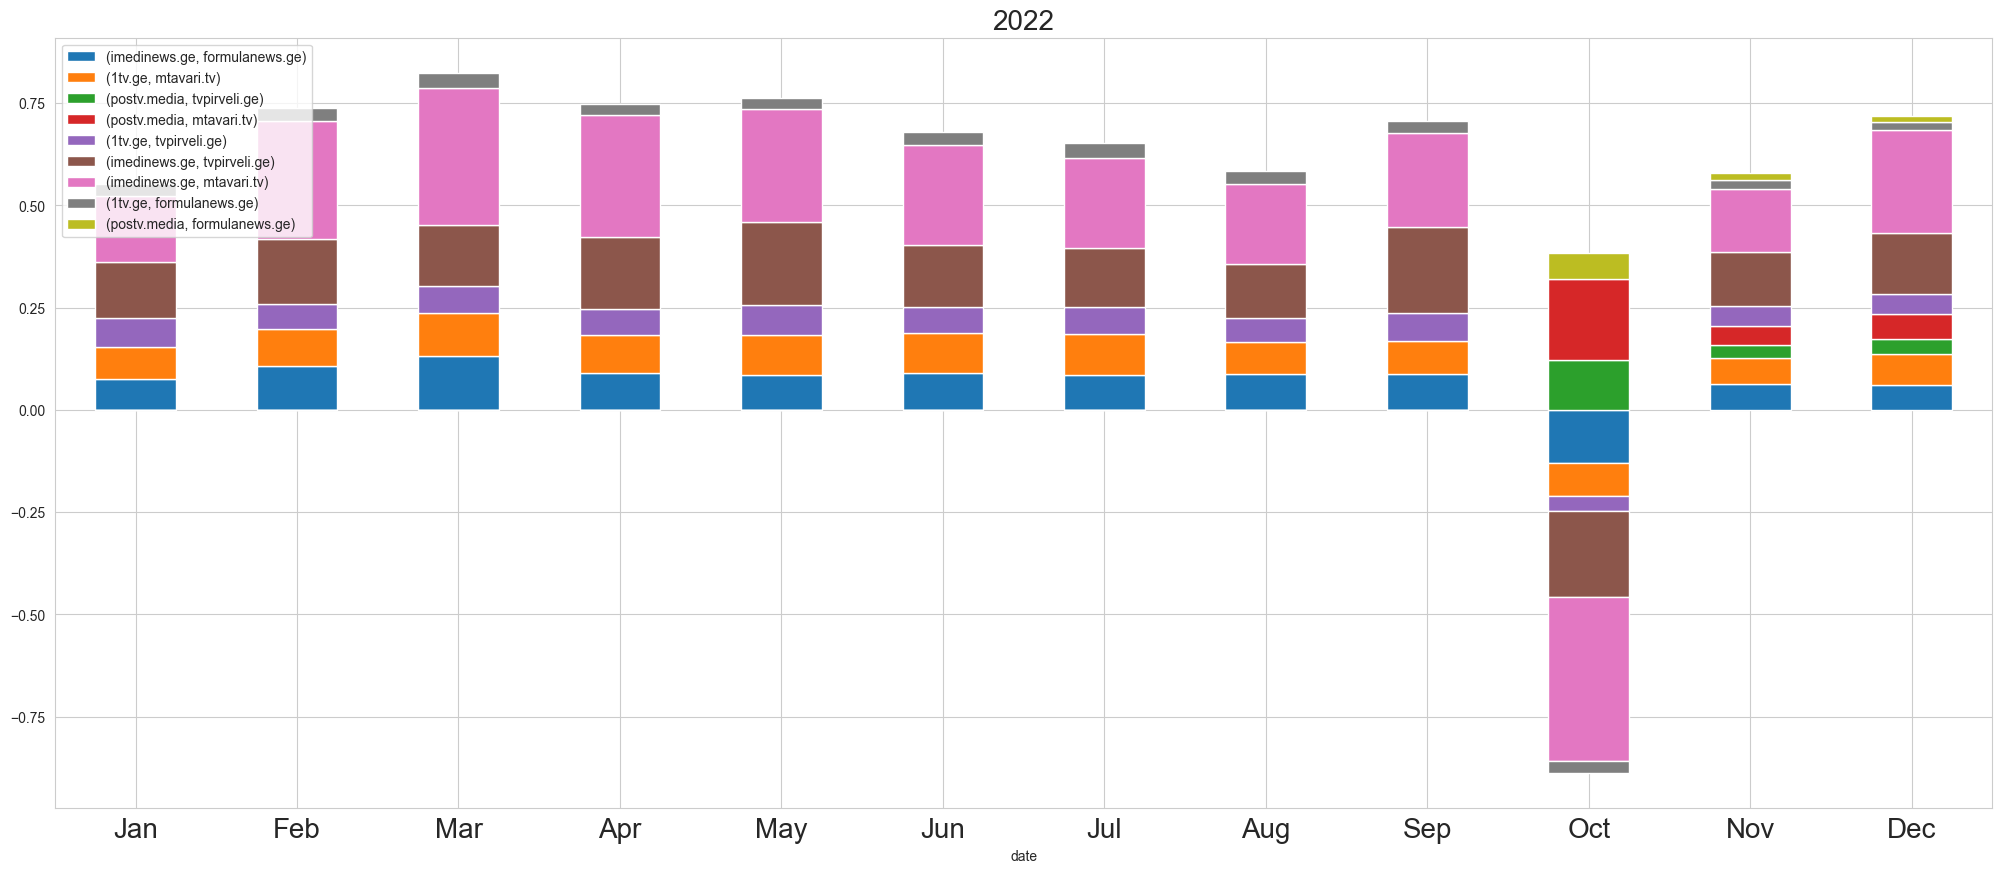

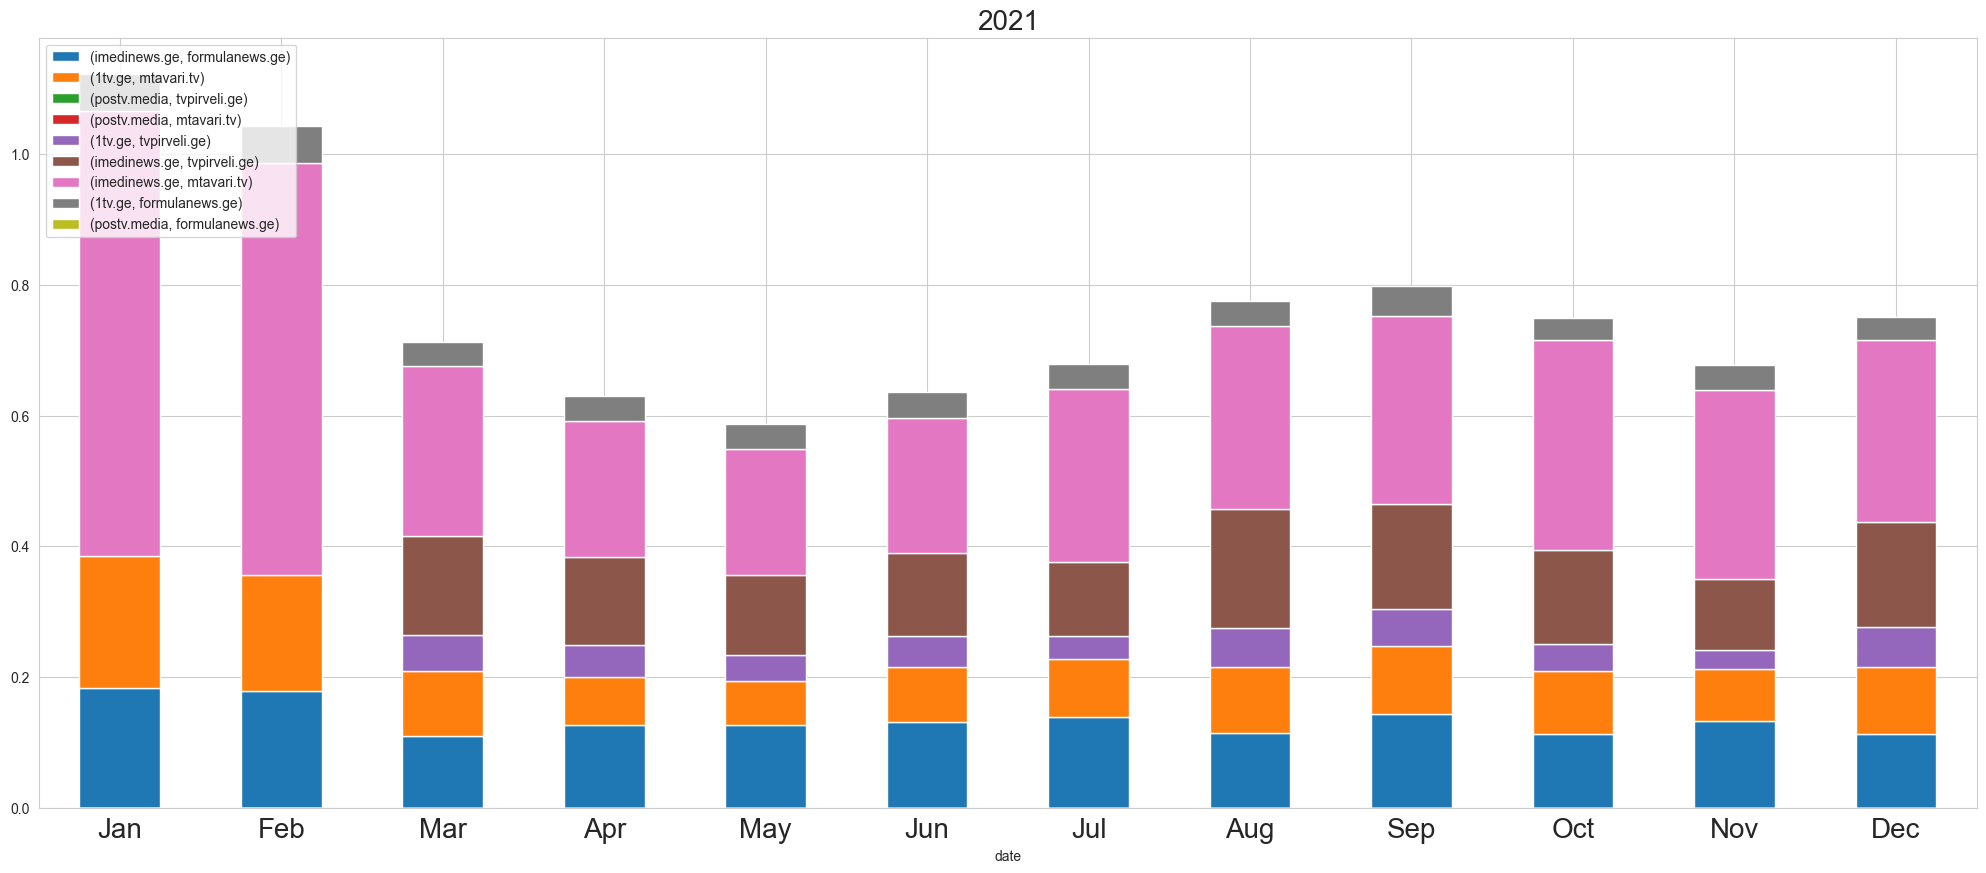

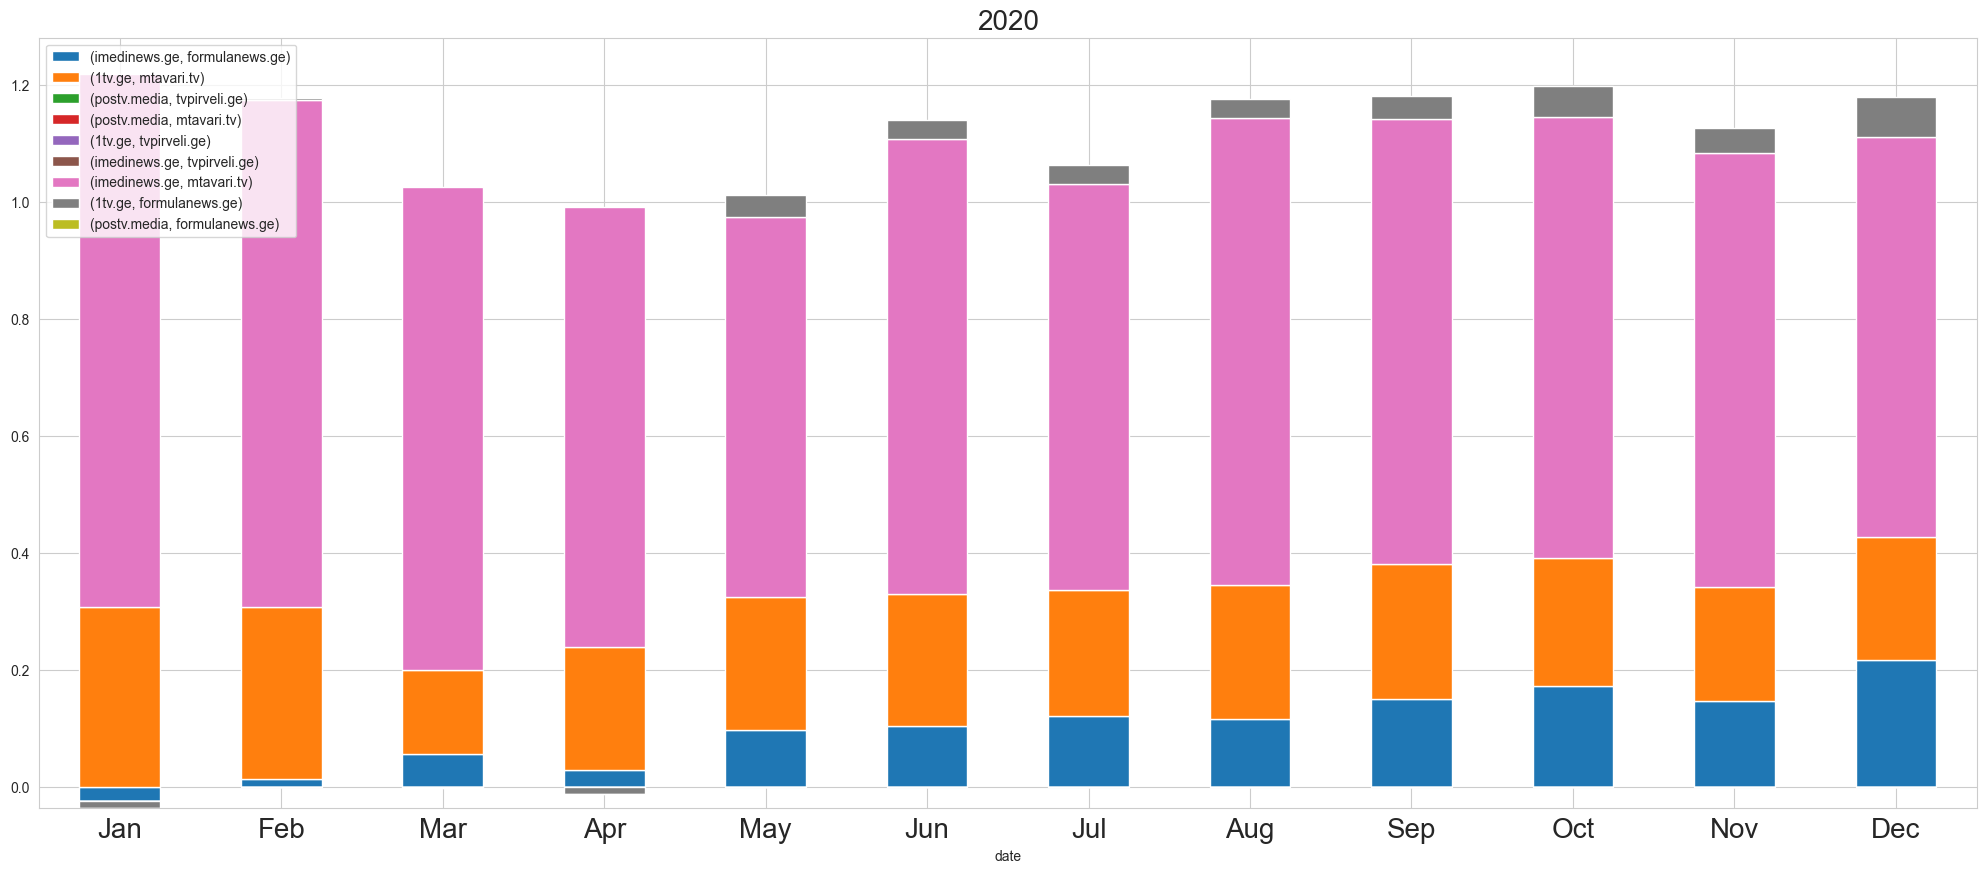

In [5]:
polarity_obj.plot_clustered_polarity(polarity_df)

2023-05-18 15:31:49,623 : INFO : Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-05-18 15:31:49,629 : INFO : MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 15 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation.mp4


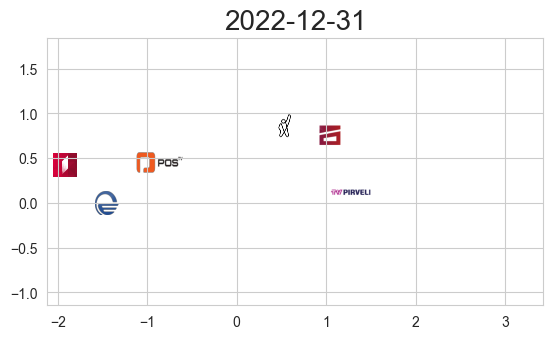

In [6]:
polarity_obj.save_animation()